# 1 Installation

In [833]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from statistics import mode
from scipy import stats
import copy

from sklearn.metrics import mean_absolute_error as mae
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge

warnings.filterwarnings("ignore") 

In [834]:
# Common method

# check NULL or 0 or NA or "" value
def NULL_VALUES(df):
    return df.isnull().sum().sum()

# drop the column if the data is useless
def DROP_COLUMN(df, colName):
    df.drop(columns=colName,inplace= True)
    return df

# check the number of a column
def NUMBEROFVALUES(df, colName):
    return df[colName].value_counts()

# check Data Type
def CHECK_IS_NUMBER(df):
    return df.select_dtypes(include=['float64', 'int64'])

def CHECK_NOT_NUMBER(df):
    return df.select_dtypes(exclude=['float64', 'int64'])

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [835]:
# Load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [836]:
# Try to print the data
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [837]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# 2 Train/Test data Comparison

In [838]:
# Check the size of the data frame
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [839]:
# Check the Dtype of the data frame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [840]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [841]:
data_combine = pd.concat([train, test]).reset_index(drop=True)
train_withoutsp = train.drop(columns=['SalePrice'])
data_combine_withoutsp = pd.concat([train_withoutsp, test]).reset_index(drop=True)
data_combine_withoutsp.shape

(2919, 80)

# 3 Feature Engineering

    3.1 Distinguish numerical VS categorical features

In [842]:
num = CHECK_IS_NUMBER(data_combine_withoutsp)
ca = CHECK_NOT_NUMBER(data_combine_withoutsp)
print("Numeric features:", len(num.keys()))
for i in num.keys(): print(i, end=' ', flush=True)
print("\n\nCategoric features:", len(ca.keys()))
for i in ca.keys(): print(i, end=' ', flush=True)

Numeric features: 37
Id MSSubClass LotFrontage LotArea OverallQual OverallCond YearBuilt YearRemodAdd MasVnrArea BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr TotRmsAbvGrd Fireplaces GarageYrBlt GarageCars GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal MoSold YrSold 

Categoric features: 43
MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition 

    3.2 Find out the null values (NA / 0) of the model

In [843]:
# find NA value
pd.set_option('display.max_rows', None)
num_na = num.isnull().sum()
num_na = num_na[num_na>0]
print('There are {} Numeric features consist of NA value\n'.format(len(num_na)))
print(num_na)

There are 11 Numeric features consist of NA value

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64


In [844]:
# find NA value
pd.set_option('display.max_rows', None)
ca_na = ca.isnull().sum()
ca_na = ca_na[ca_na>0]
print('There are {} Categoric features consist of NA value\n'.format(len(ca_na)))
print(ca_na)

There are 23 Categoric features consist of NA value

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


In [845]:
num_0 = (num == 0).sum()
num_0 = num_0[num_0>0]
print('There are {} Numeric features consist of 0 value'.format(len(num_0)))
num_0

There are 23 Numeric features consist of 0 value


MasVnrArea       1738
BsmtFinSF1        929
BsmtFinSF2       2571
BsmtUnfSF         241
TotalBsmtSF        78
2ndFlrSF         1668
LowQualFinSF     2879
BsmtFullBath     1705
BsmtHalfBath     2742
FullBath           12
HalfBath         1834
BedroomAbvGr        8
KitchenAbvGr        3
Fireplaces       1420
GarageCars        157
GarageArea        157
WoodDeckSF       1523
OpenPorchSF      1298
EnclosedPorch    2460
3SsnPorch        2882
ScreenPorch      2663
PoolArea         2906
MiscVal          2816
dtype: int64

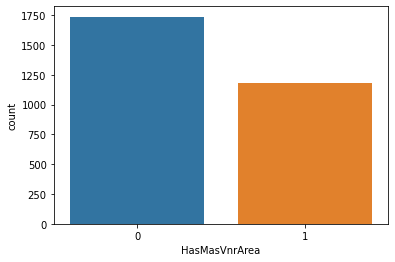

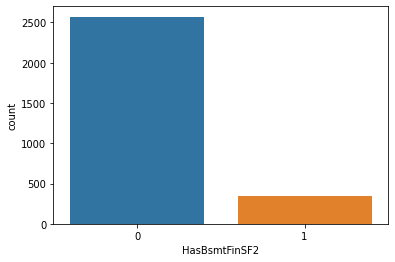

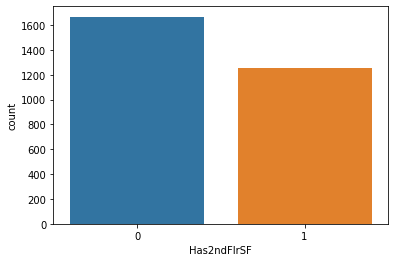

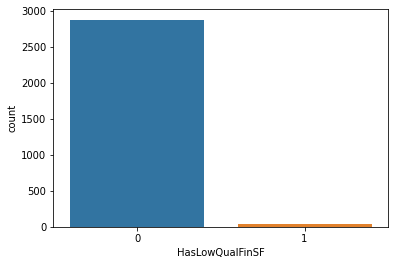

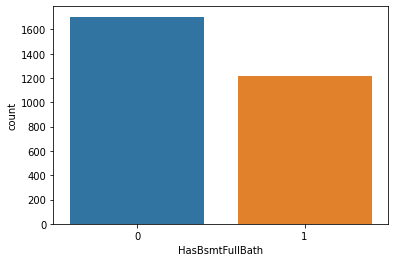

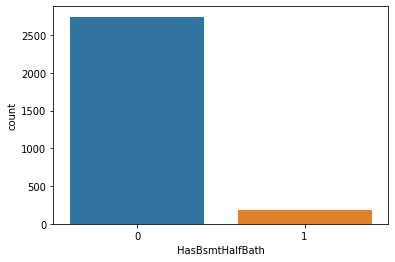

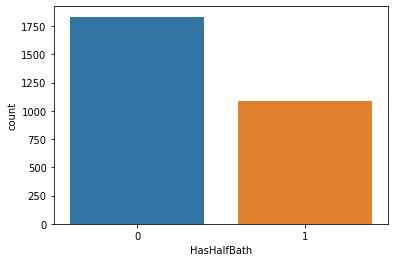

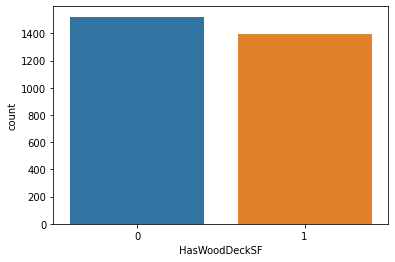

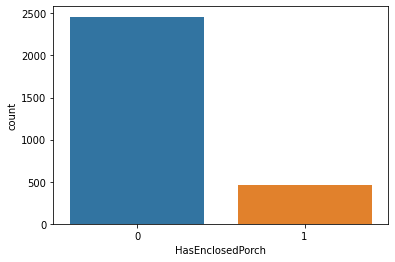

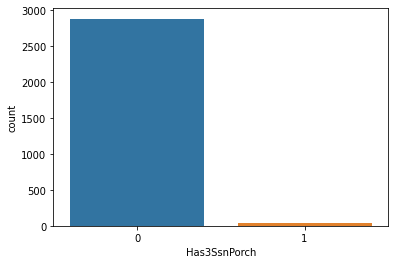

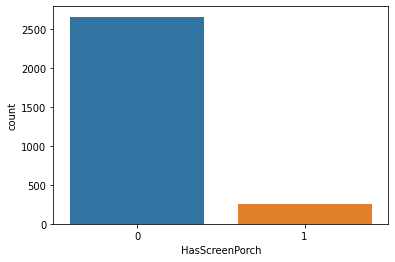

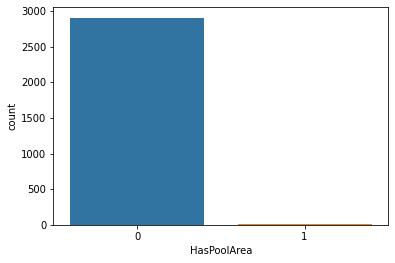

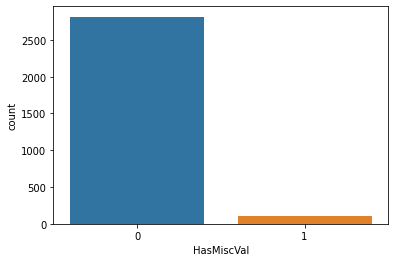

In [846]:
for key,value in num_0.items():
    missingRate = value/len(data_combine[key])*100
    if missingRate > 50:
        new_column = "Has" + key
        data_combine[new_column] = np.where(data_combine[key]==0, 0, 1)
        ax = sb.countplot(x=new_column, data=data_combine)
        plt.show()

    3.3 Check the percentage of the missing value (NA)

In [847]:
missingRate_num = {}
for column in num_na.keys():
  missingRate_num[column] = num_na[column]/len(data_combine_withoutsp[column])*100

df = pd.DataFrame({'Columns' : missingRate_num.keys(), 'Percentage': missingRate_num.values()}).sort_values(by = 'Percentage', ascending = False)
df

,Columns,Percentage
0,LotFrontage,16.649538
8,GarageYrBlt,5.447071
1,MasVnrArea,0.787941
6,BsmtFullBath,0.068517
7,BsmtHalfBath,0.068517
2,BsmtFinSF1,0.034258
3,BsmtFinSF2,0.034258
4,BsmtUnfSF,0.034258
5,TotalBsmtSF,0.034258
9,GarageCars,0.034258


In [848]:
missingRate_ca = {}
for column in ca_na.keys():
  missingRate_ca[column] = ca_na[column]/len(data_combine_withoutsp[column])*100

df = pd.DataFrame({'Columns' : missingRate_ca.keys(), 'Percentage': missingRate_ca.values()}).sort_values(by = 'Percentage', ascending = False)
df

,Columns,Percentage
19,PoolQC,99.657417
21,MiscFeature,96.402878
1,Alley,93.216855
20,Fence,80.438506
14,FireplaceQu,48.646797
17,GarageQual,5.447071
16,GarageFinish,5.447071
18,GarageCond,5.447071
15,GarageType,5.378554
7,BsmtCond,2.809181


    3.4 Missing Value Imputation

In [849]:
# drop the missing column >80%

combine_drop = data_combine.drop(columns=['PoolQC','MiscFeature','Alley','Fence'])
ca = ca.drop(columns=['PoolQC','MiscFeature','Alley','Fence'])
print("Find the missing percentage higher than 80 and drop the columns: 'PoolQC','MiscFeature','Alley','Fence'")

# drop the related columns
combine_drop = combine_drop.drop(columns=['PoolArea','MiscVal'])
num = num.drop(columns=['PoolArea','MiscVal'])
del num_0["PoolArea"]
del num_0["MiscVal"]
print("Also, drop the related columns: 'PoolArea','MiscVal'")

combine_drop.shape

Find the missing percentage higher than 80 and drop the columns: 'PoolQC','MiscFeature','Alley','Fence'
Also, drop the related columns: 'PoolArea','MiscVal'


(2919, 88)

In [850]:
# fill in missing value with median
for key,value in missingRate_num.items():
    med = combine_drop[key].median()
    combine_drop[key] = combine_drop[key].fillna(med)

# fill in missing value with mode or Others
for key,value in missingRate_ca.items():
    if value < 10:
        mod = mode(combine_drop[key])
        combine_drop[key] = combine_drop[key].fillna(mod)
    elif value < 80 and value > 10:
        combine_drop[key] = combine_drop[key].fillna("Others")

combine_drop_na = combine_drop.isnull().sum()
combine_drop_na[combine_drop_na>0]

SalePrice    1459
dtype: int64

    3.5 Outliers Detection

In [851]:
# Distribution of the numerical
num = DROP_COLUMN(num, "Id")
num.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,12.000000,2010.000000


    3.5.1 Reduce skewness

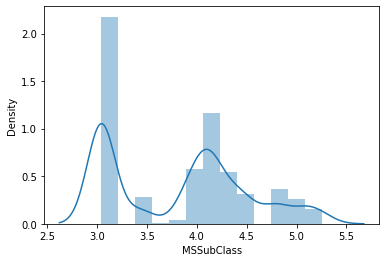

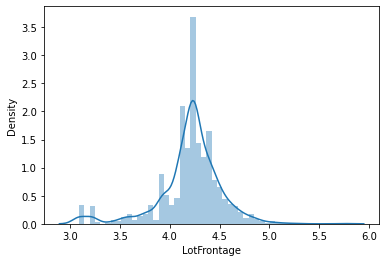

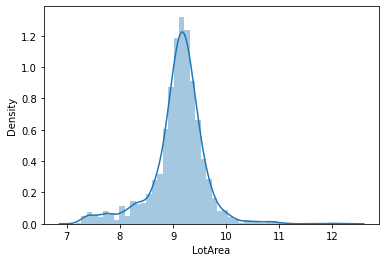

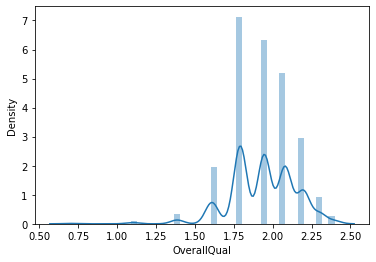

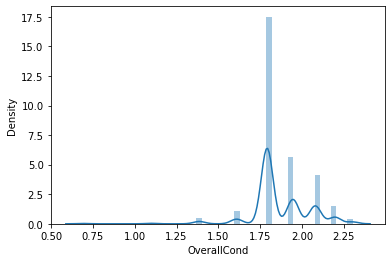

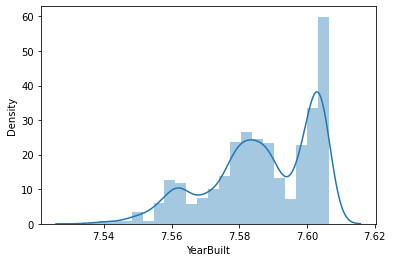

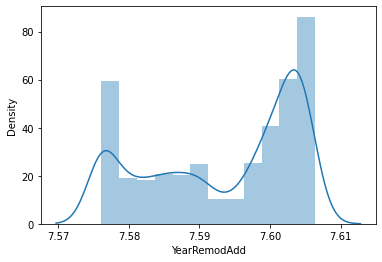

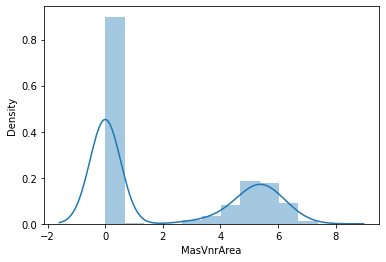

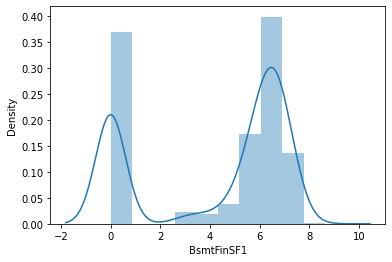

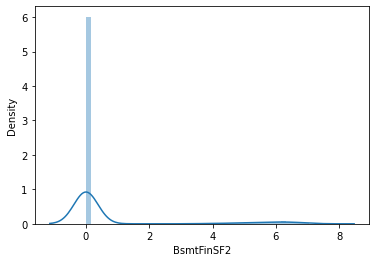

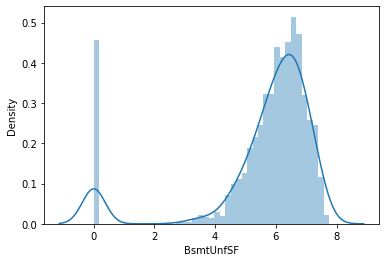

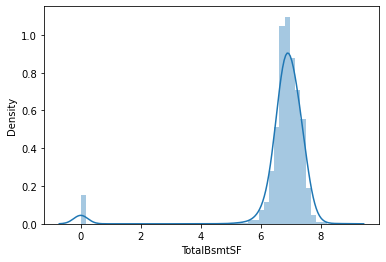

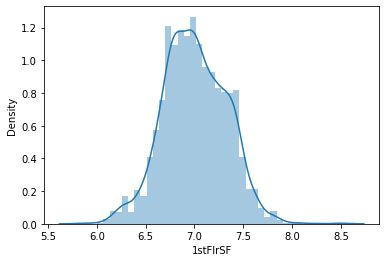

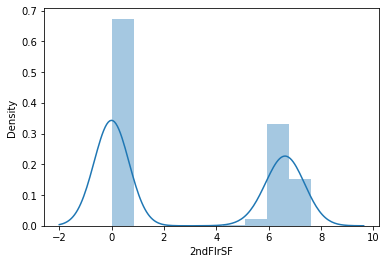

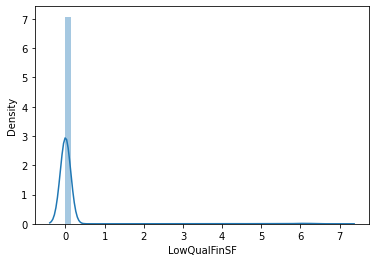

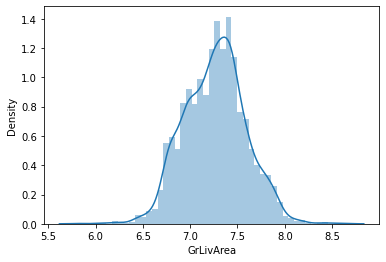

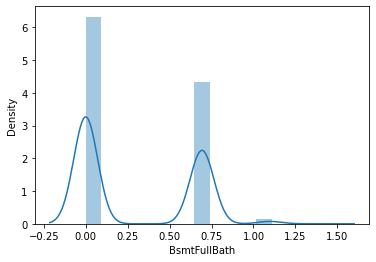

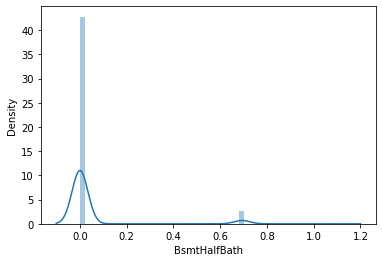

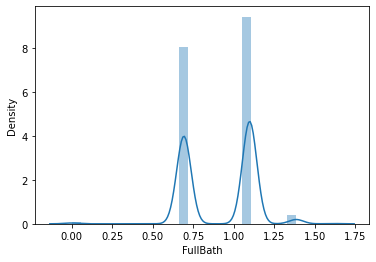

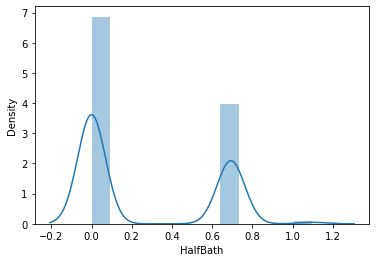

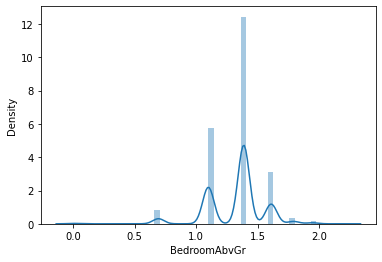

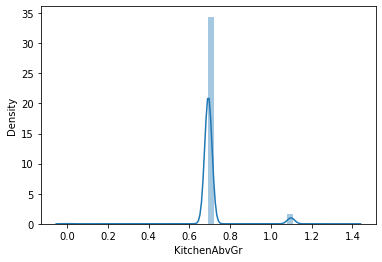

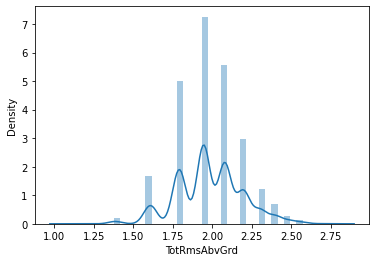

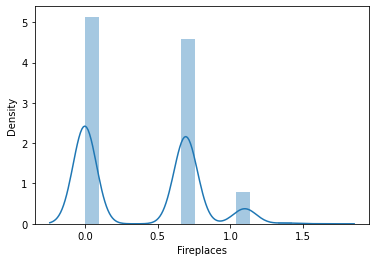

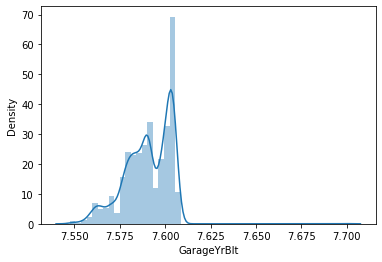

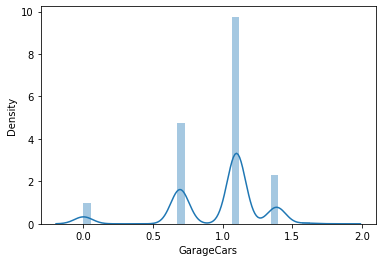

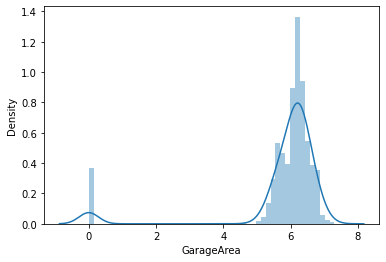

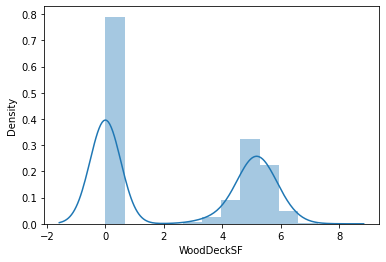

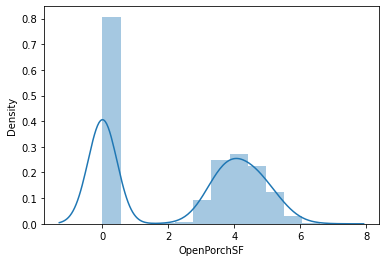

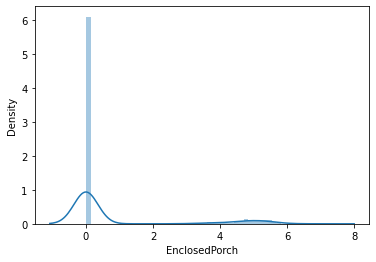

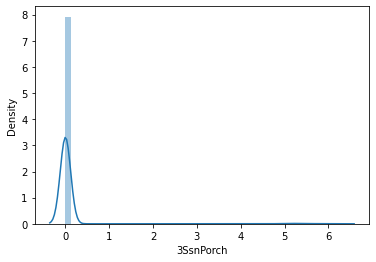

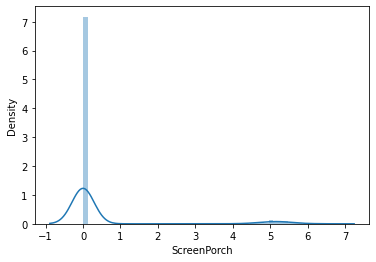

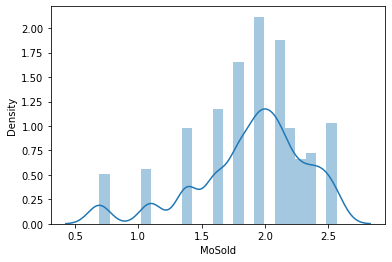

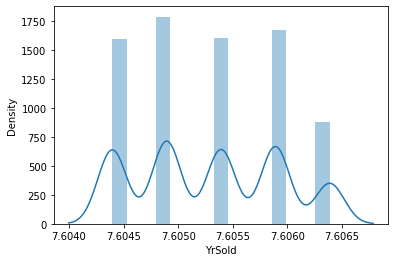

In [852]:
# log1p

combine_drop_loglp = copy.deepcopy(combine_drop)

for column in num:
    combine_drop_loglp[column] = np.log1p(combine_drop_loglp[column])
    sb.distplot(combine_drop_loglp[column])
    plt.show()

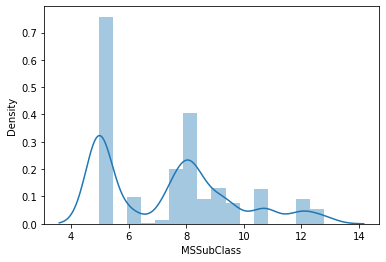

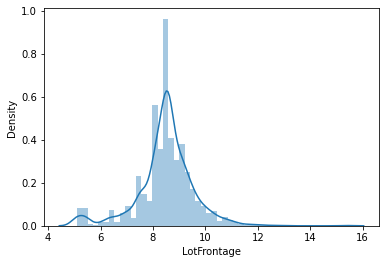

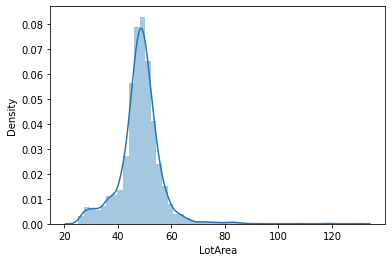

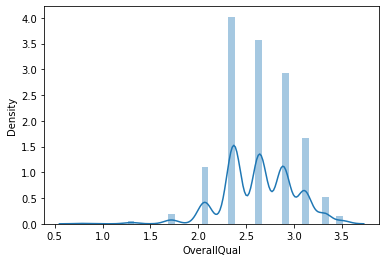

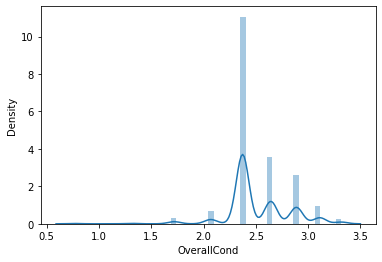

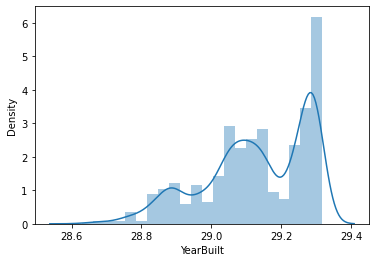

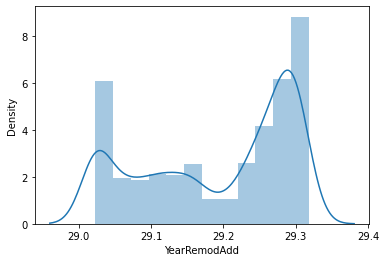

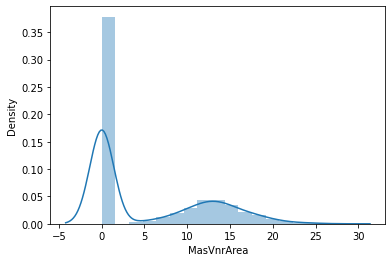

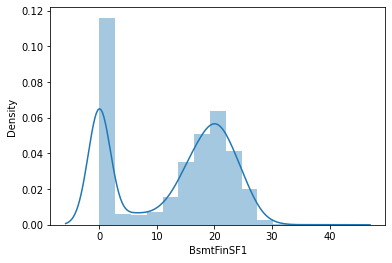

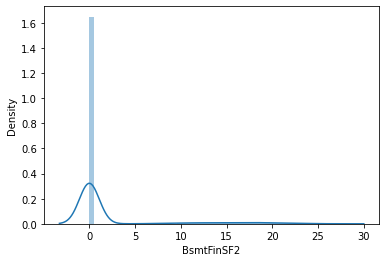

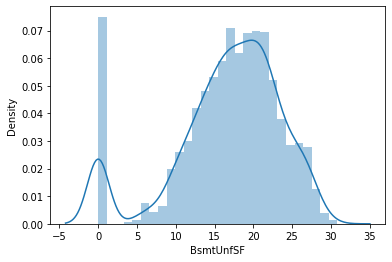

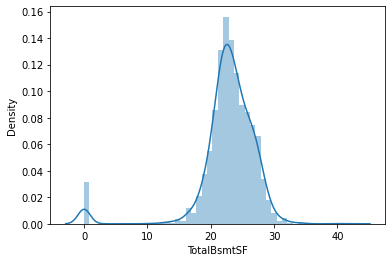

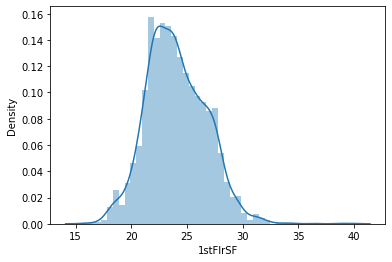

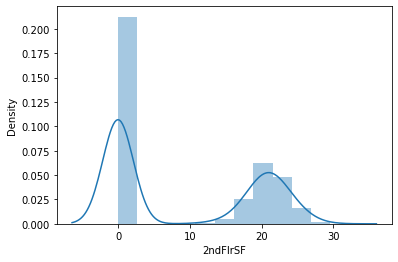

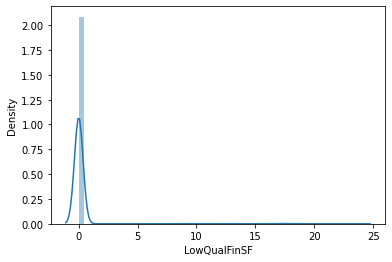

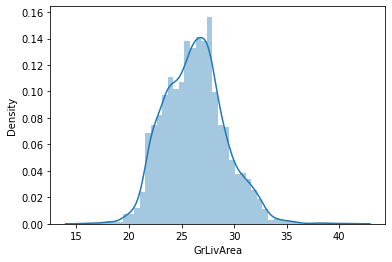

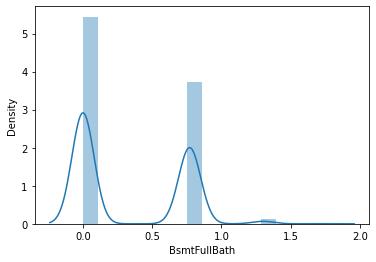

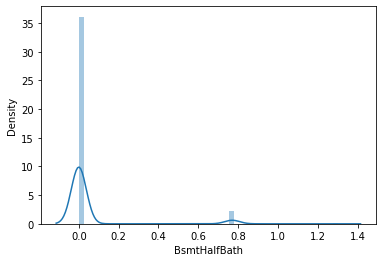

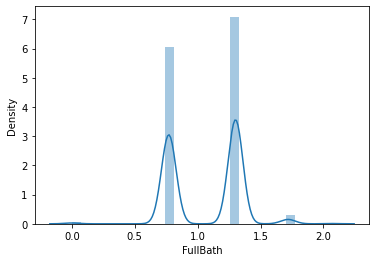

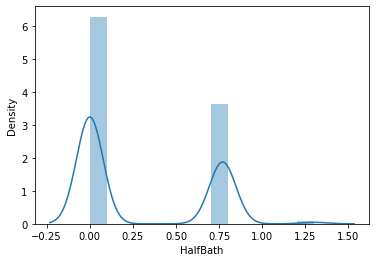

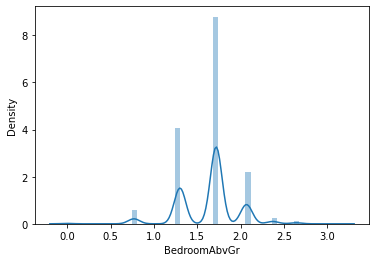

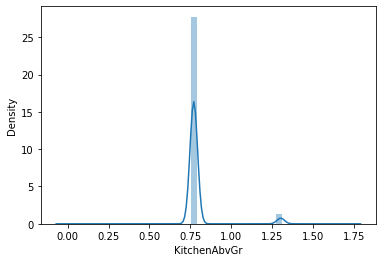

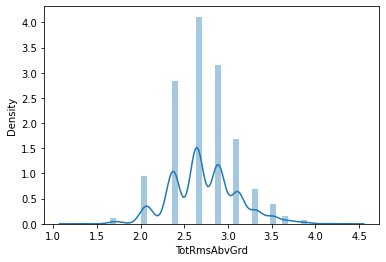

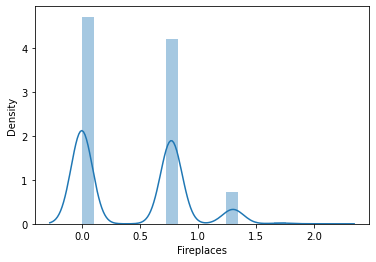

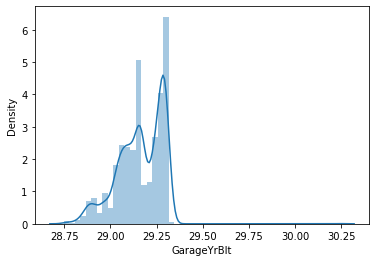

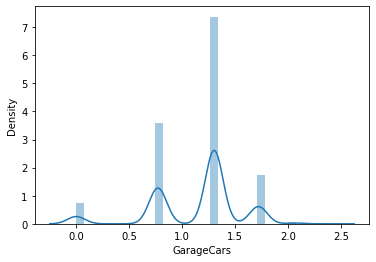

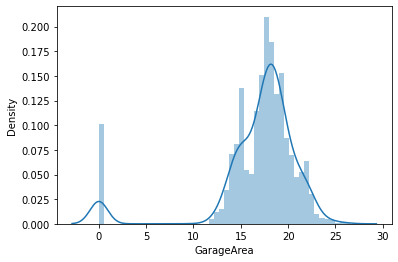

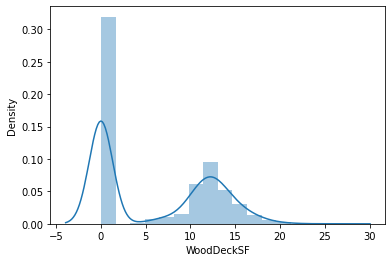

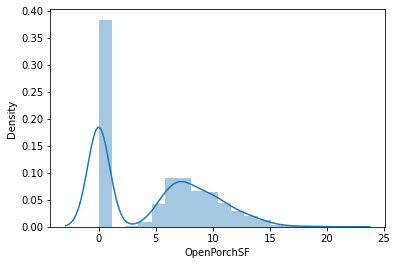

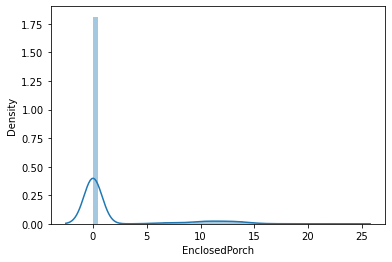

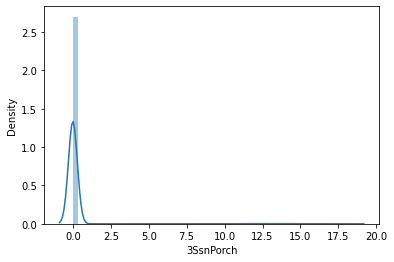

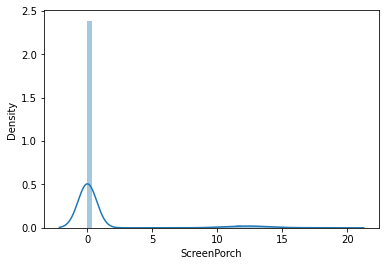

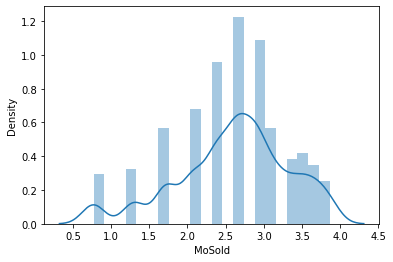

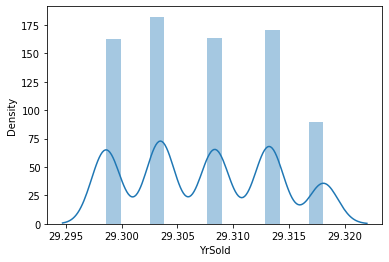

In [853]:
# boxcox

combine_drop_bx = copy.deepcopy(combine_drop)

for column in num:
    combine_drop_bx[column] = combine_drop_bx[column] + 1
    combine_drop_bx[column] = stats.boxcox(combine_drop_bx[column], lmbda=0.3)

    sb.distplot(combine_drop_bx[column])
    plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

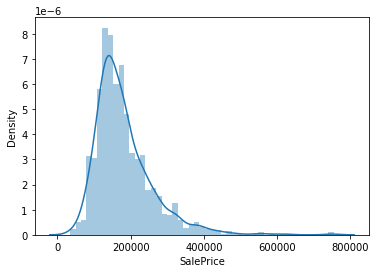

In [854]:
sb.distplot(combine_drop["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

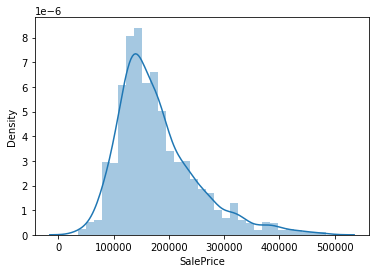

In [855]:
combine_drop["SalePrice"] = combine_drop["SalePrice"].loc[combine_drop["SalePrice"]<500000]
sb.distplot(combine_drop["SalePrice"])

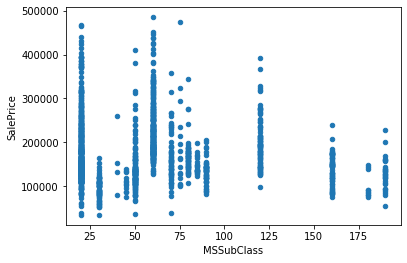

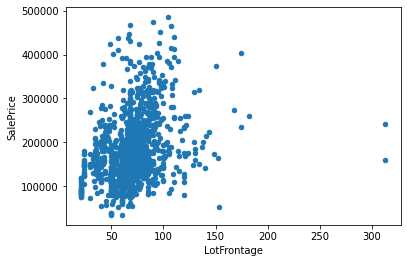

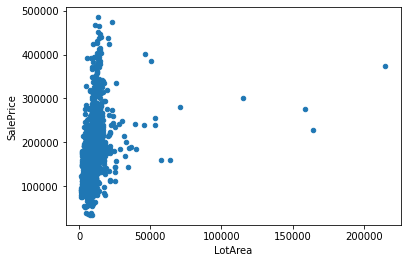

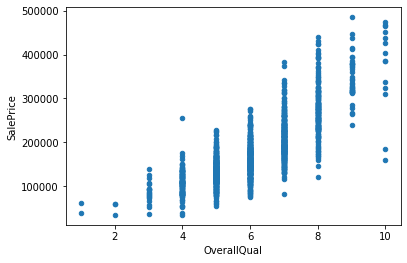

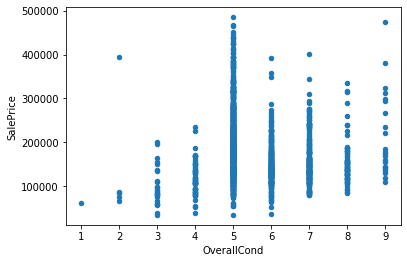

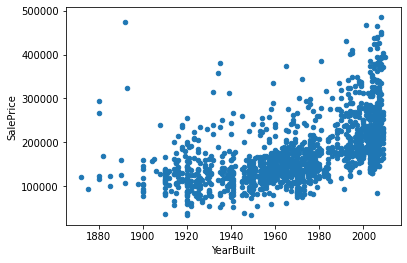

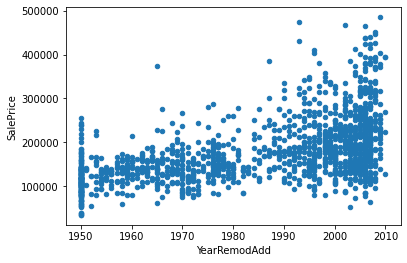

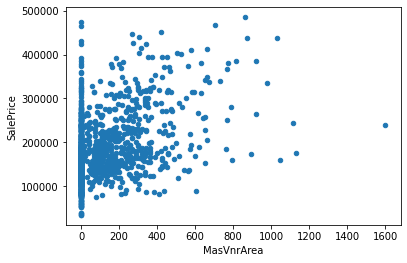

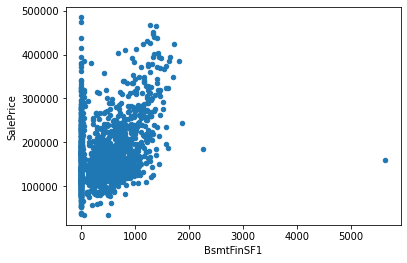

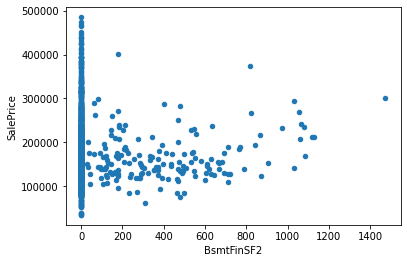

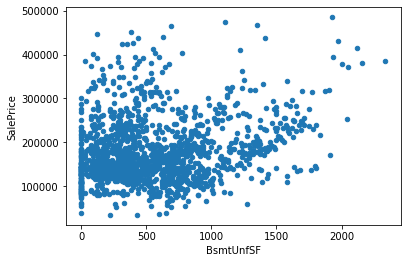

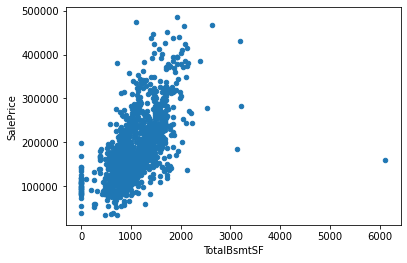

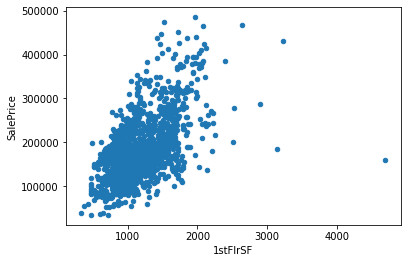

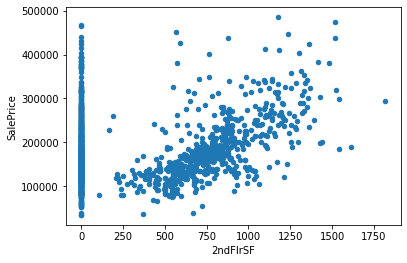

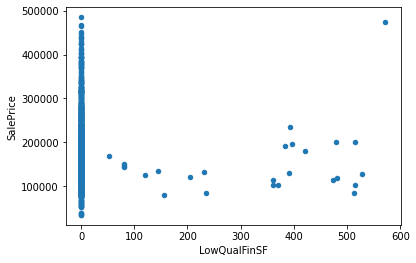

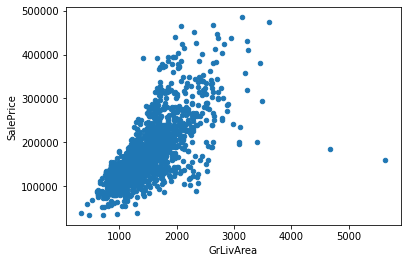

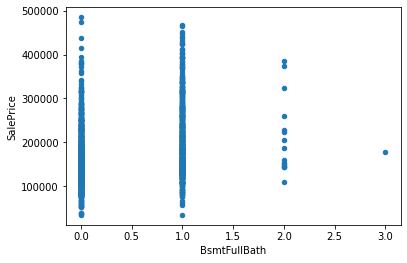

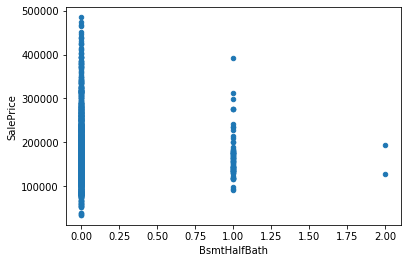

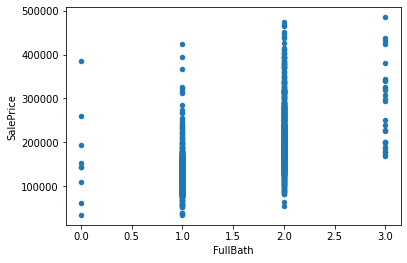

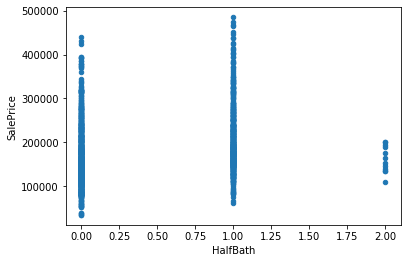

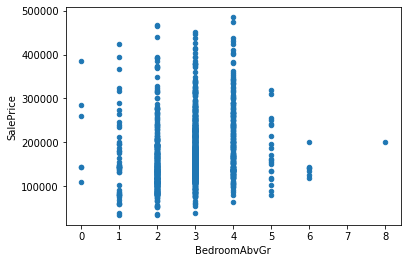

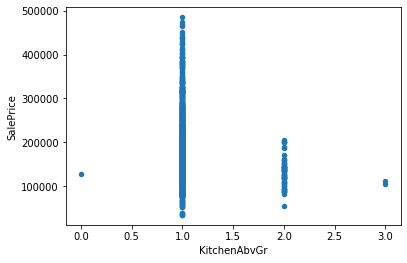

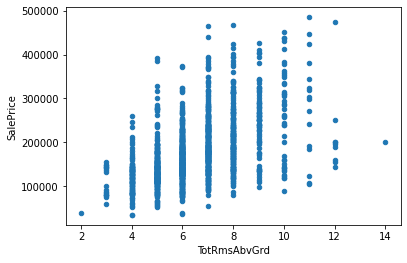

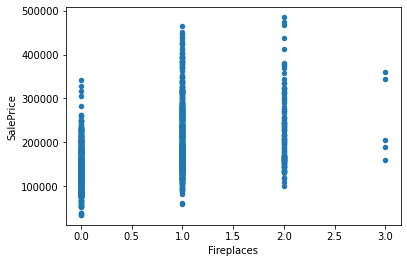

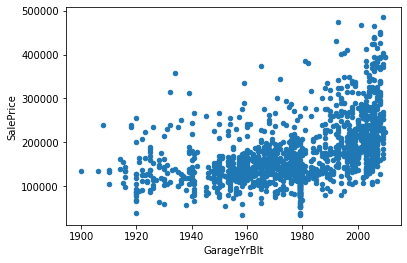

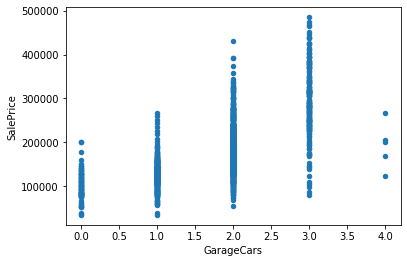

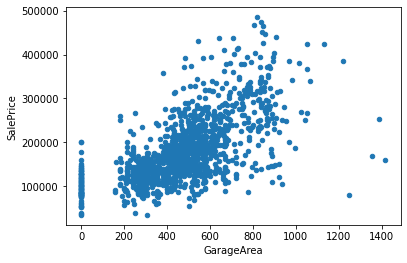

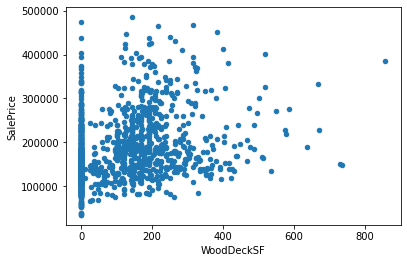

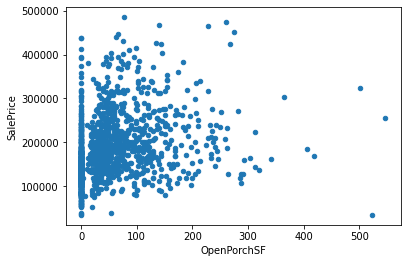

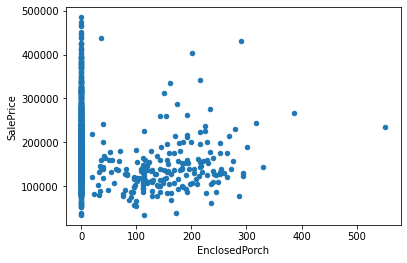

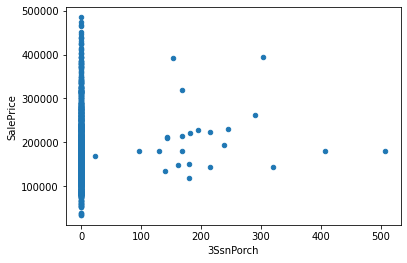

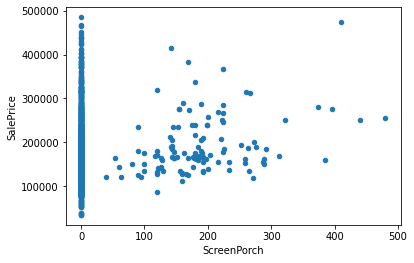

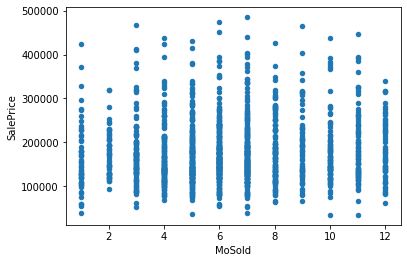

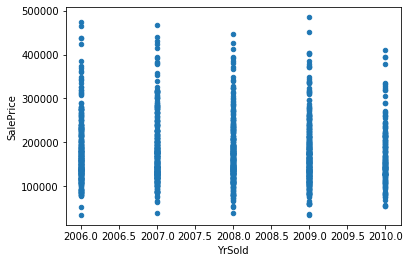

In [856]:
for column in num:
  ax2 = combine_drop.plot.scatter(x=column, y='SalePrice')
  # ax2 = sb.swarmplot(x=column, y='SalePrice', data=combine_drop)

  plt.show()

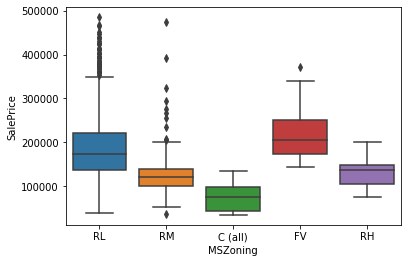

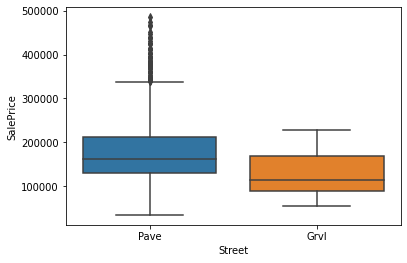

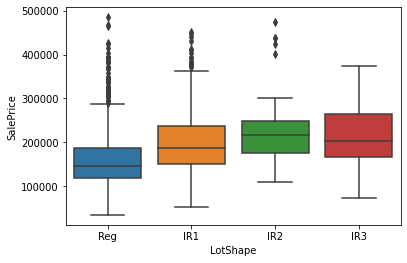

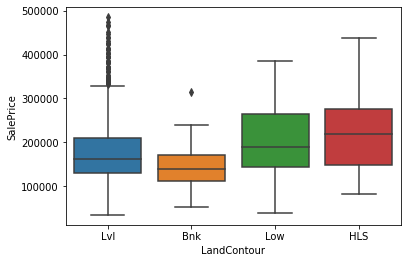

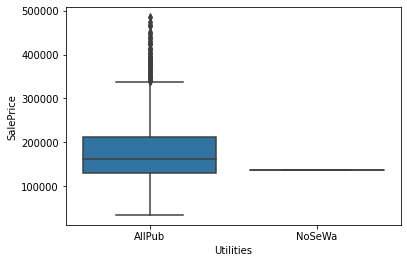

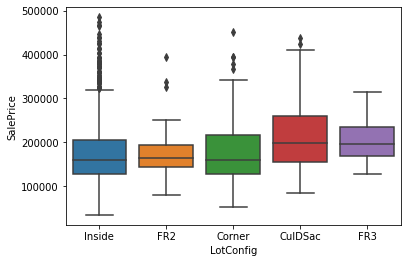

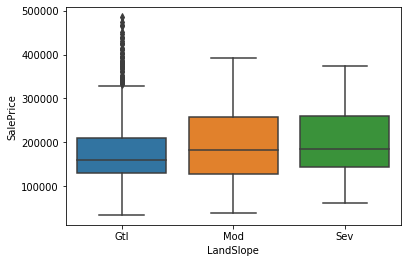

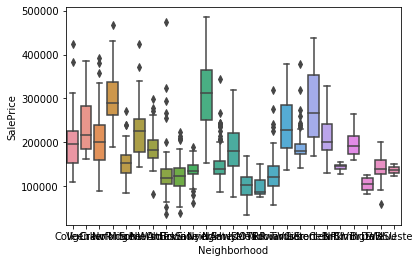

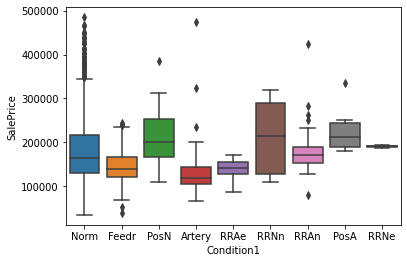

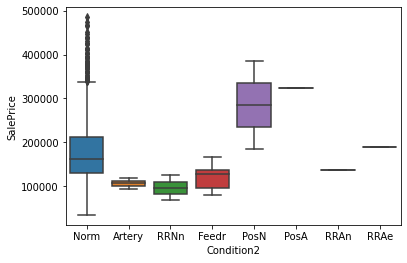

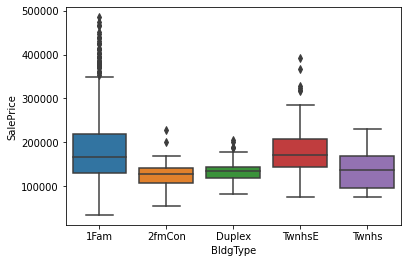

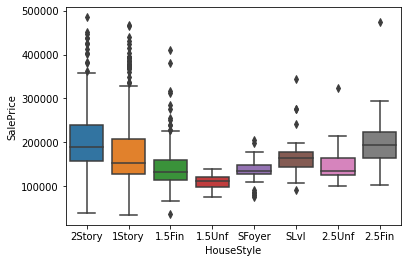

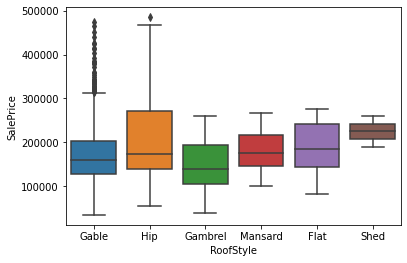

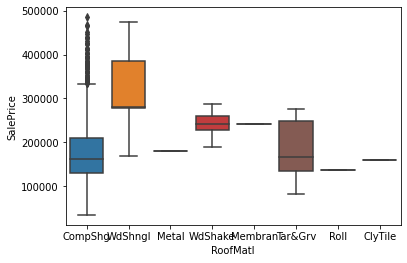

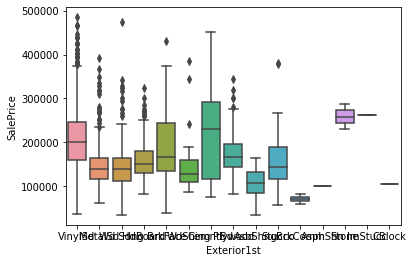

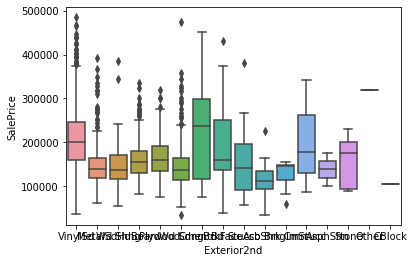

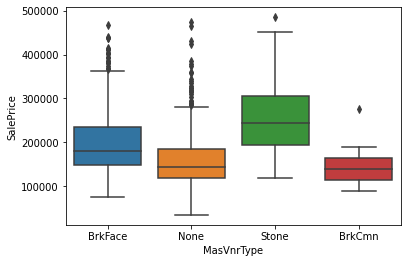

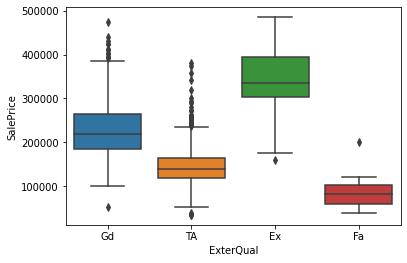

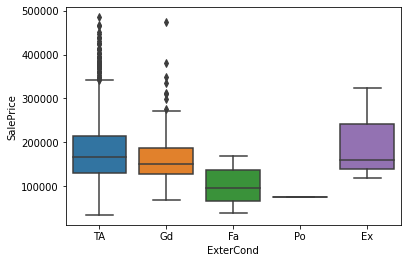

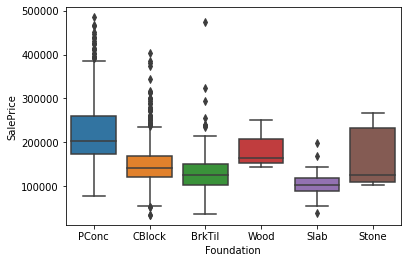

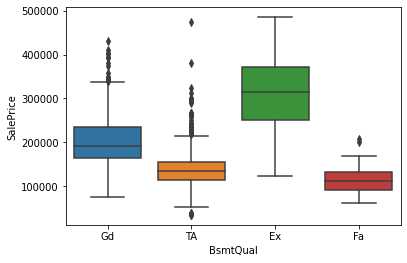

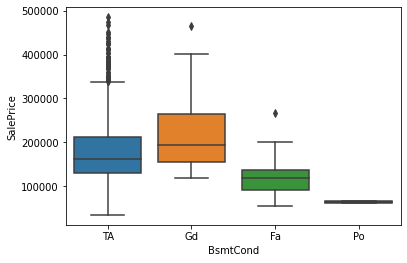

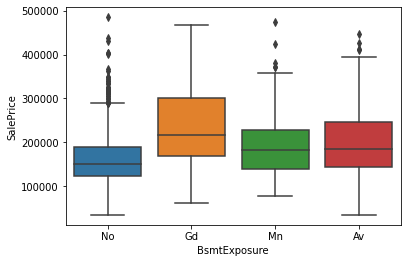

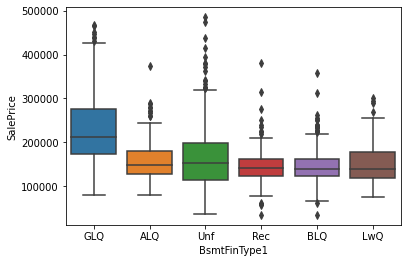

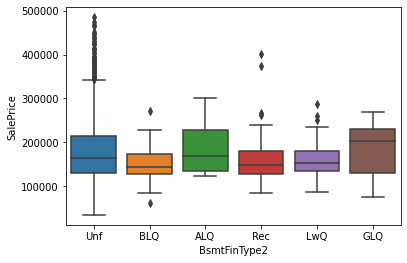

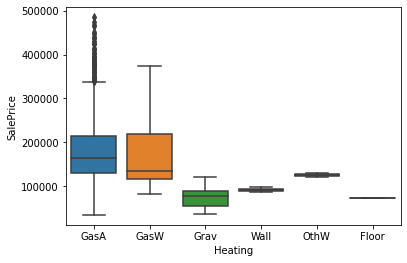

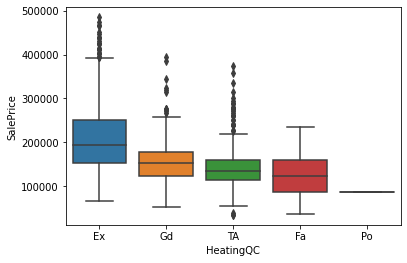

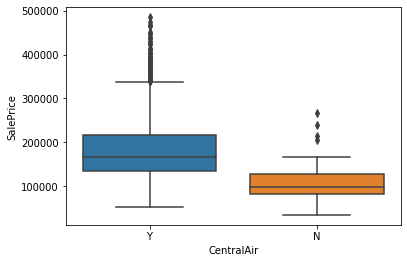

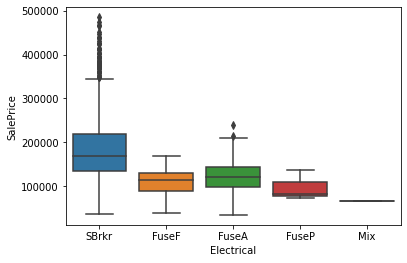

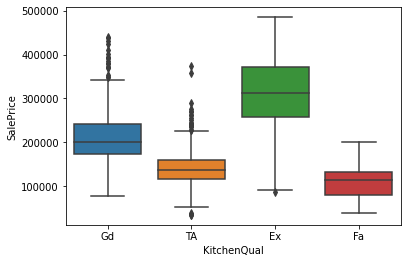

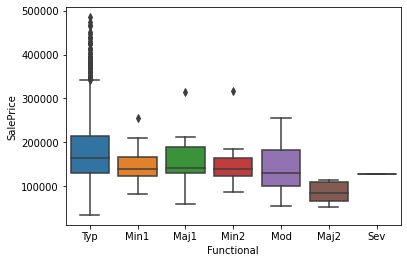

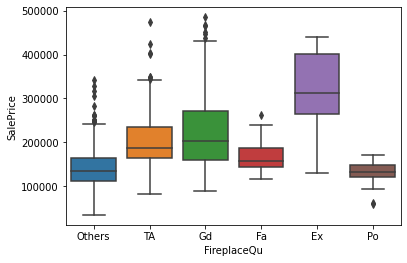

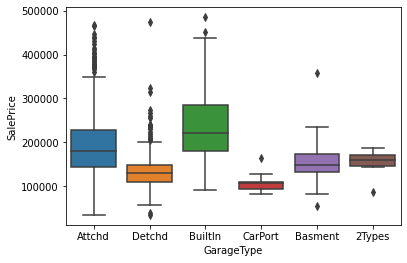

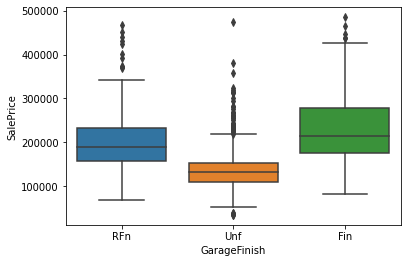

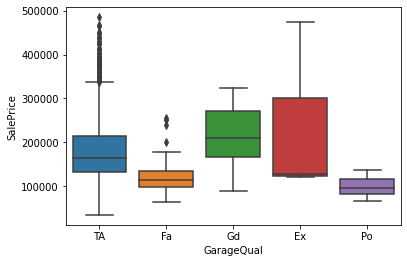

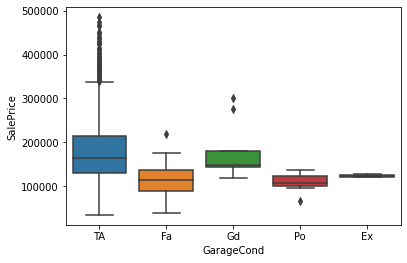

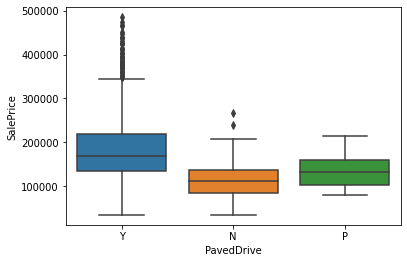

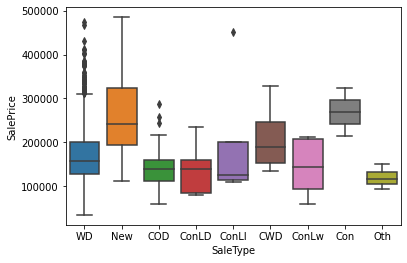

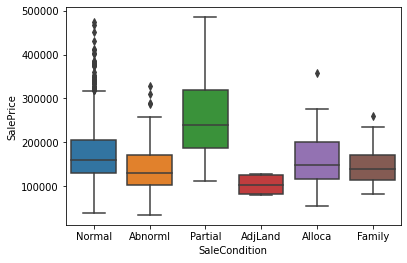

In [857]:
for column in ca:
  sb.boxplot(x=column, y="SalePrice", data=combine_drop)
  plt.show()

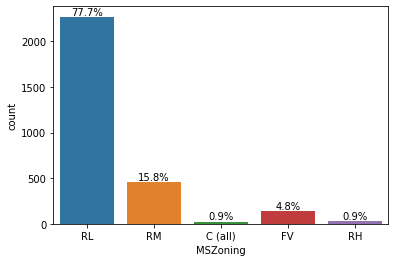

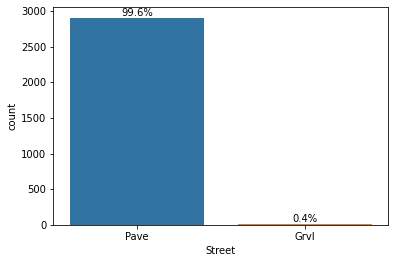

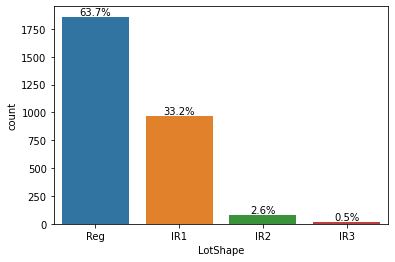

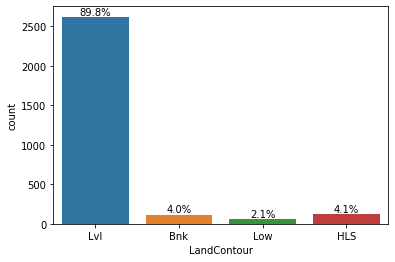

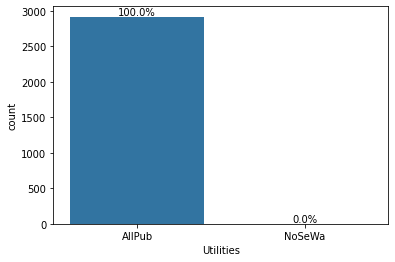

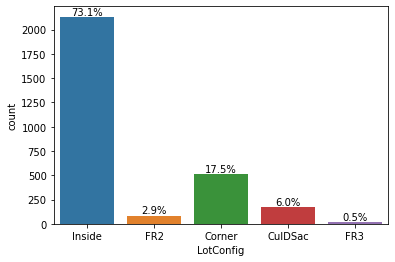

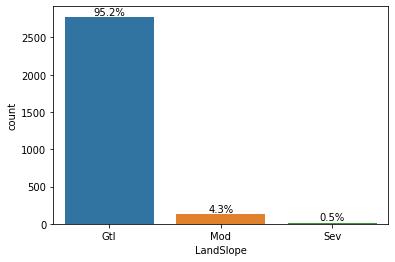

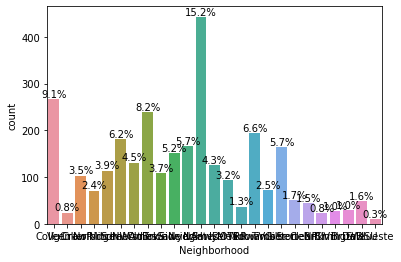

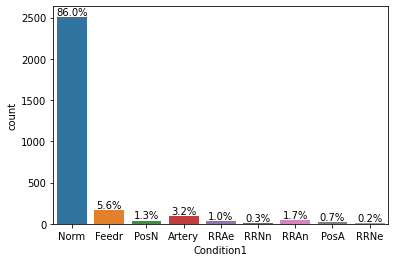

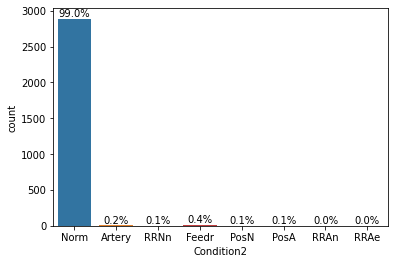

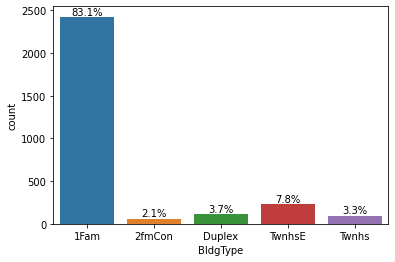

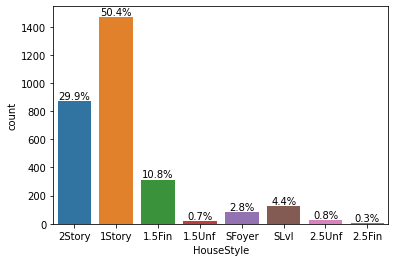

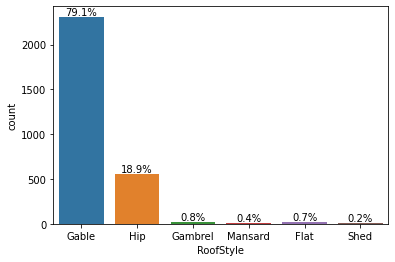

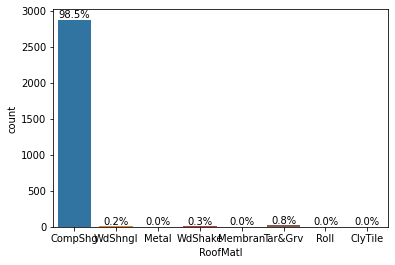

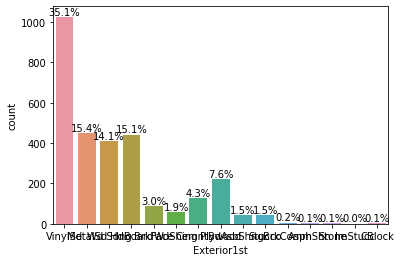

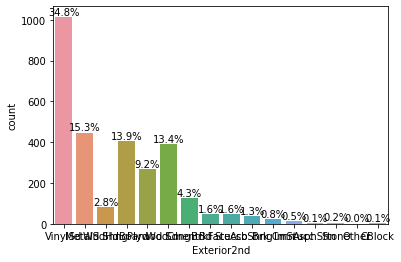

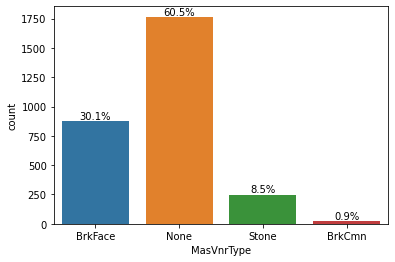

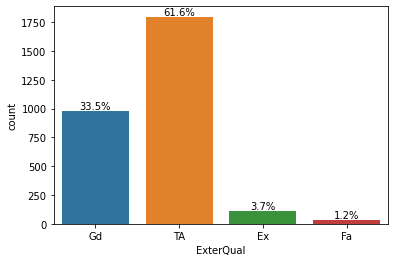

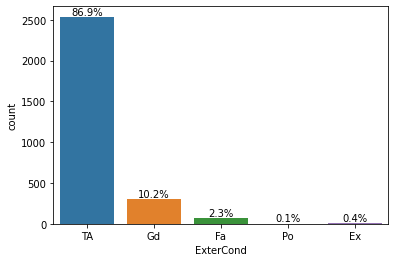

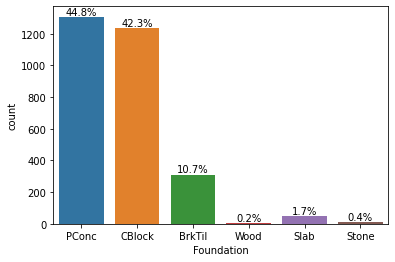

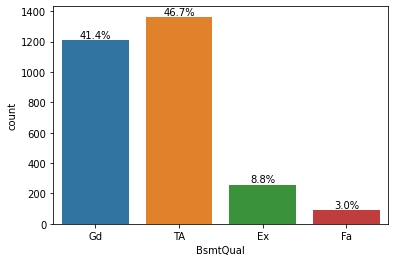

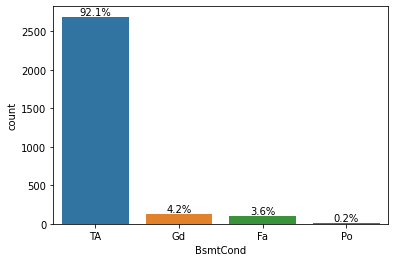

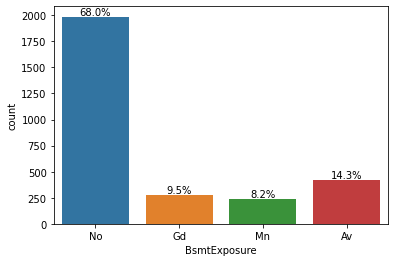

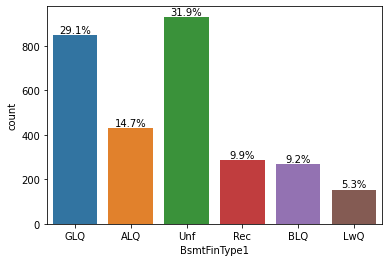

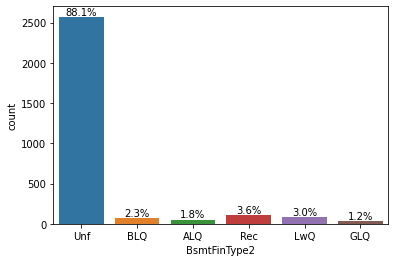

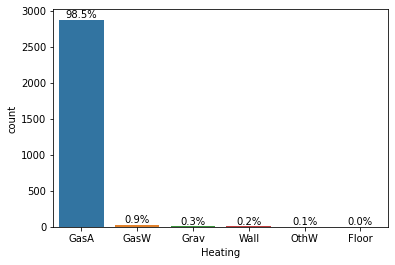

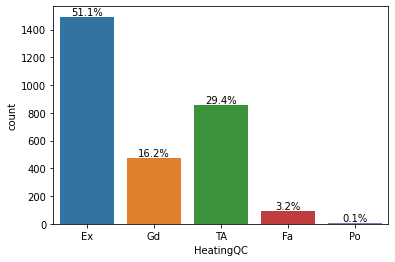

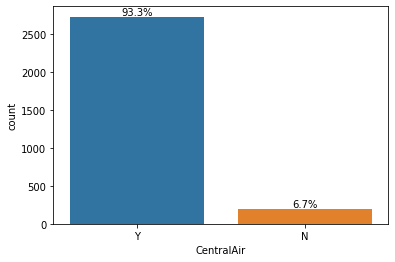

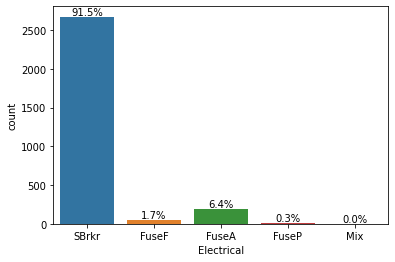

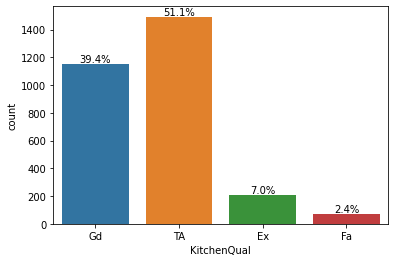

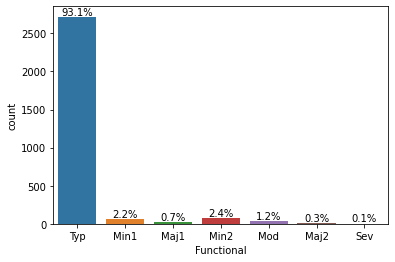

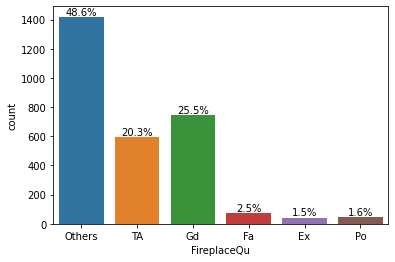

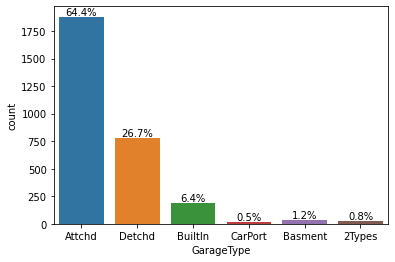

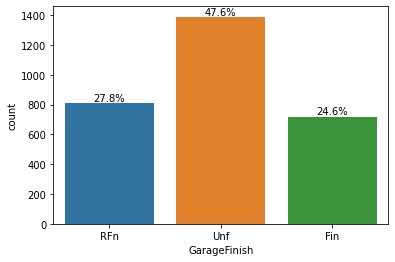

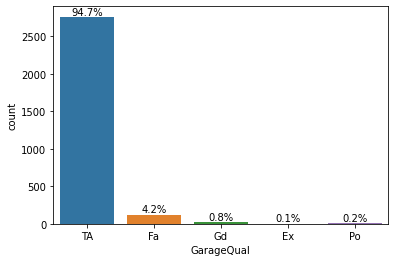

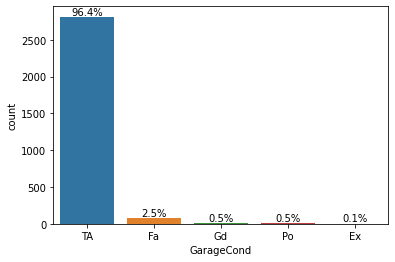

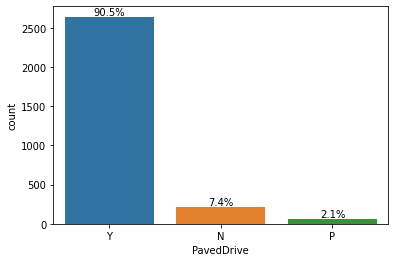

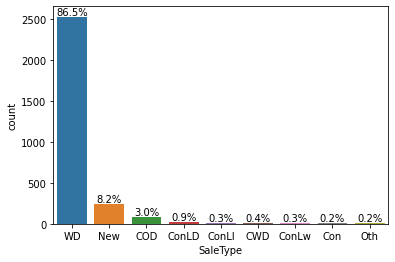

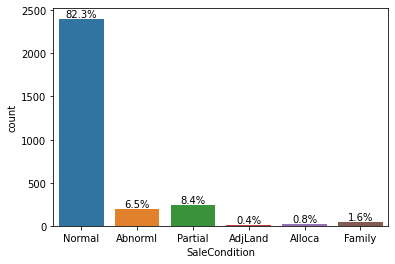

In [858]:
for column in ca:
  ax = sb.countplot(x=column, data=combine_drop)
  ncount = len(ca)

  for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha='center',va='bottom')

  plt.show()

    3.6 Change the categorical value to number

In [859]:
#LabelCount Encoding

labelencoder = LabelEncoder()
lce = combine_drop

for key,value in ca.items():
    lce[key] = labelencoder.fit_transform(lce[key])
    lce[key] = np.bincount(lce[key])

lce.head()

    3.7 Feature Transformation

In [860]:
#Binning or Binarization (e.g. （score >= 60）和 0（score < 60）)


    3.8 Feature Combination

# 4 Prediction Function

In [861]:
lce_na = lce.isnull().sum()
print(lce_na[lce_na>0])
print(lce.shape)

y = train["SalePrice"]
X = lce.drop(['SalePrice'], axis=1)
len_X_half = int(len(X)/2) + 1
print(len_X_half)

X_train = X[:len_X_half]
X_test = X[len_X_half:]
y_train = y[:len_X_half]
print(X_train.shape)
print(X_test.shape)

SalePrice    1468
dtype: int64
(2919, 88)
1460
(1460, 87)
(1459, 87)


    Lasso Regression

In [862]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
lasso_model = lasso.fit(X_train,y_train)

lasso_predict_X_train = np.floor(lasso_model.predict(X_train))
rms = mean_squared_error(y_train, lasso_predict_X_train, squared=False)
print('Root Mean Squared Error: %.1f' % rms)

lasso_predict = lasso_model.predict(X_test)
print('Predicted: ', lasso_predict)

lasso_preds = pd.DataFrame({'Id' : test["Id"], 'SalePrice': lasso_predict})
lasso_preds.to_csv('lasso_sumbmission.csv', index = False)

ValueError: could not convert string to float: 'RL'

    Kernel Ridge Regression

In [ ]:
krr = KernelRidge(alpha=1.0,kernel='polynomial')
krr_model = krr.fit(X_train,y_train)

krr_predict_X_train = np.floor(krr_model.predict(X_train))
rms = mean_squared_error(y_train, krr_predict_X_train, squared=False)
print('Root Mean Squared Error: %.1f' % rms)

krr_predict = krr_model.predict(X_test)
print('Predicted: ', krr_predict)

krr_preds = pd.DataFrame({'Id' : test["Id"], 'SalePrice': krr_predict})
krr_preds.to_csv('krr_sumbmission.csv', index = False)

Root Mean Squared Error: 237.4
Predicted:  [152350.5   99090.   131689.5  ... 288537.   130883.75 429731.75]


    Elastic Net Regression

    Gradient Boosting Regression

    XGBoost

    Light GBM

    KNN

    SVR

    Adaboost

    SGD Regressor

    XGB Regressor

    LGBM Regressor

    Random Forest Regressor

    Linear Regression (0.18069)

In [ ]:
regr = LinearRegression()
regr_model = regr.fit(X_train,y_train)

regr_predict_X_train = np.floor(regr_model.predict(X_train))
rms = mean_squared_error(y_train, regr_predict_X_train, squared=False)
print('Root Mean Squared Error: %.1f' % rms)

regr_predict = regr_model.predict(X_test)
print('Predicted: ', regr_predict)

regr_preds = pd.DataFrame({'Id' : test["Id"], 'SalePrice': regr_predict})
regr_preds.to_csv('regr_sumbmission.csv', index = False)

Root Mean Squared Error: 30189.6
Predicted:  [105146.20190546 154082.26270669 162188.65795173 ... 147858.74566984
 113086.67088073 241105.71171409]


    Logistic Regression

In [ ]:
lr = LogisticRegression()
lr_model = lr.fit(X_train,y_train)

lr_predict_X_train = np.floor(lr_model.predict(X_train))
rms = mean_squared_error(y_train, lr_predict_X_train, squared=False)
print('Root Mean Squared Error: %.1f' % rms)

lr_predict = lr_model.predict(X_test)
print('Predicted: ', lr_predict)

lr_preds = pd.DataFrame({'Id' : test["Id"], 'SalePrice': lr_predict})
lr_preds.to_csv('lr_sumbmission.csv', index = False)

Root Mean Squared Error: 59942.0
Predicted:  [135000 160000 160000 ... 160000 135000 197000]


# 5 Result output

In [ ]:
predict = lasso_predict

In [ ]:
print(len(test["Id"]))
print(len(predict))

preds = pd.DataFrame({'Id' : test["Id"], 'SalePrice': predict})
preds.to_csv('final_sumbmission.csv', index = False)

1459
1459
